In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
import math
from scipy import norm
from scipy.optimize import brentq

from scipy import stats

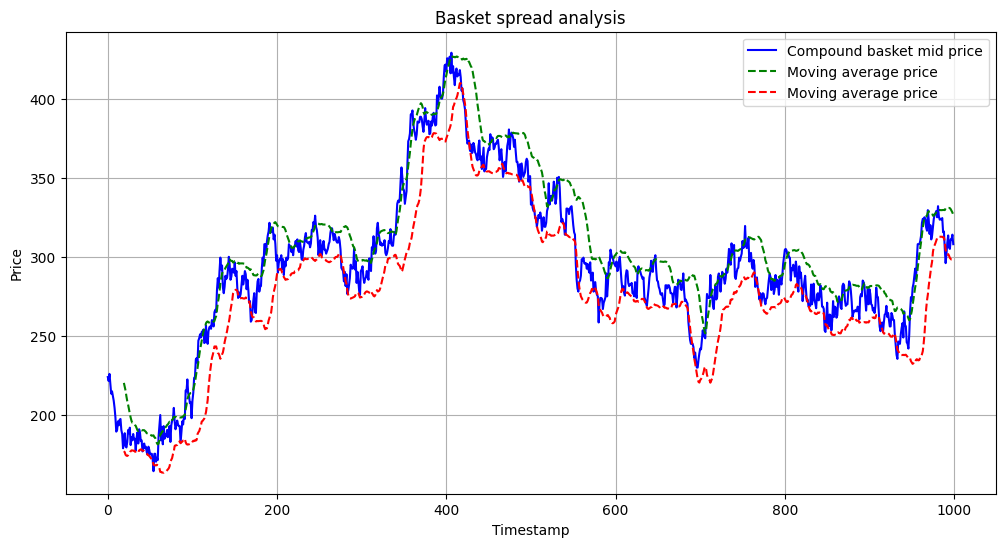

292.6655 51.67618755045693


In [225]:
csv_file_path = "./data/other/round_4_test_2024.csv"
# csv_file_path = "./data/round_3/results.csv"
# csv_file_path = "./data/round_4/prices_round_4_day_1.csv"
df = pd.read_csv(csv_file_path, sep=';')

products = np.unique(df['product'])

data = {}
stat = 'mid_price'

for prod in products:
    data[prod] = df[df['product'] == prod]
    
data["COMPOUND_BASKET"] = (1 * data["ROSES"][stat].values + 4 * data["CHOCOLATE"][stat].values + 6 * data["STRAWBERRIES"][stat].values)

data["BASKET_SPREAD"] = (data["GIFT_BASKET"][stat].values - data["COMPOUND_BASKET"])

window_size = 20
moving_avg = pd.Series(data["BASKET_SPREAD"]).rolling(window=window_size).mean().dropna()
moving_std = pd.Series(data["BASKET_SPREAD"]).rolling(window=window_size).std().dropna()
    
plt.figure(figsize=(12, 6))
plt.plot(data["BASKET_SPREAD"][:], marker='', linestyle='-', color='b', label="Compound basket mid price")
plt.plot((moving_avg + 1.25 * moving_std)[:], marker='', linestyle='--', color='g', label="Moving average price")
plt.plot((moving_avg - 1.75 * moving_std)[:], marker='', linestyle='--', color='r', label="Moving average price")
plt.title("Basket spread analysis")
plt.xlabel("Timestamp")
plt.ylabel("Price"),
plt.legend()
plt.grid(True)
plt.show()

# plt.figure(figsize=(12, 6))
# plt.plot(data["GIFT_BASKET"]["profit_and_loss"].values, marker='', linestyle='-', color='b', label="Compound basket mid price")
# plt.title("Basket spread analysis")
# plt.xlabel("Timestamp")
# plt.ylabel("Price"),
# plt.legend()
# plt.grid(True)
# plt.show()


print(np.mean(data["BASKET_SPREAD"]), np.std(data["BASKET_SPREAD"]))

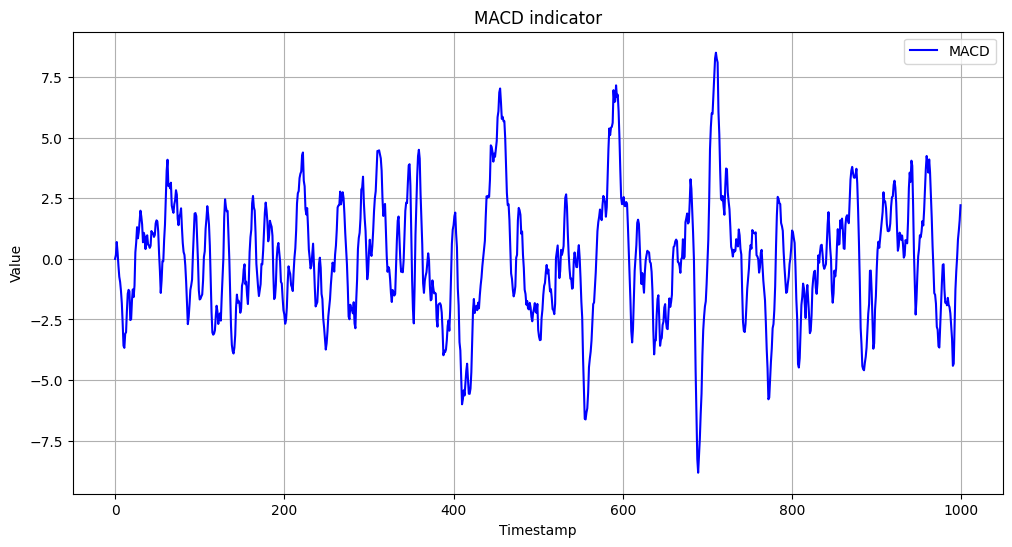

In [129]:
short_window=12
long_window=26
signal_window=9

short_ema = data["GIFT_BASKET"]["mid_price"].ewm(span=short_window, min_periods=1, adjust=False).mean()
long_ema = data["GIFT_BASKET"]["mid_price"].ewm(span=long_window, min_periods=1, adjust=False).mean()

# Calculate MACD line
macd_line = short_ema - long_ema

# Calculate signal line
signal_line = macd_line.ewm(span=signal_window, min_periods=1, adjust=False).mean()

# Calculate MACD histogram
macd_histogram = macd_line - signal_line

plt.figure(figsize=(12, 6))
plt.plot(macd_histogram.values, marker='', linestyle='-', color='b', label="MACD")
plt.title("MACD indicator")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

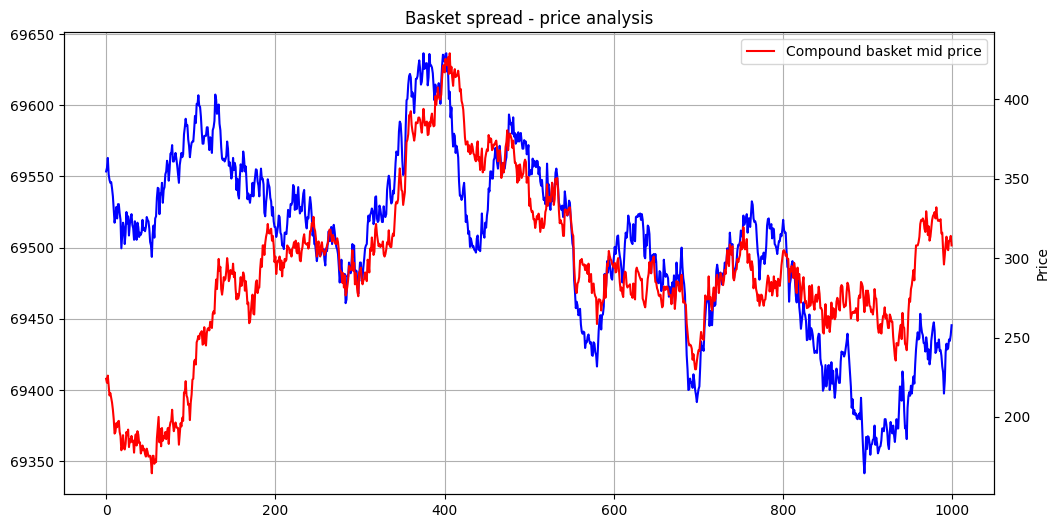

In [107]:
fig, ax1 = plt.subplots(figsize=(12,6),)
ax2 = ax1.twinx()

ax1.plot(data["GIFT_BASKET"]["mid_price"].values[:], marker='', linestyle='-', color='b', label="Real basket mid price")
ax2.plot(data["BASKET_SPREAD"][:], marker='', linestyle='-', color='r', label="Compound basket mid price")

ax1.grid(True)
# ax2.grid(True)

plt.title("Basket spread - price analysis")
plt.xlabel("Timestamp")
plt.ylabel("Price"),
plt.legend()
plt.show()

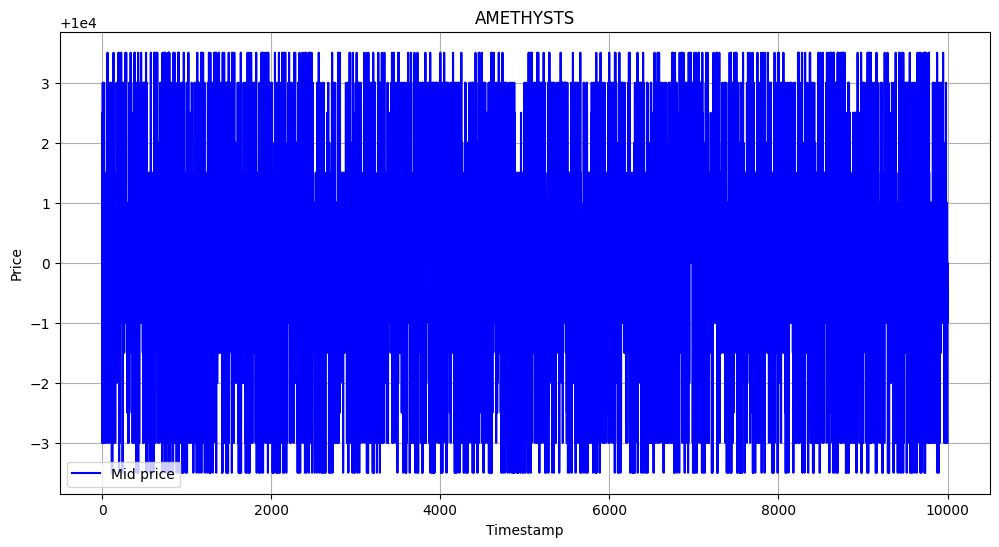

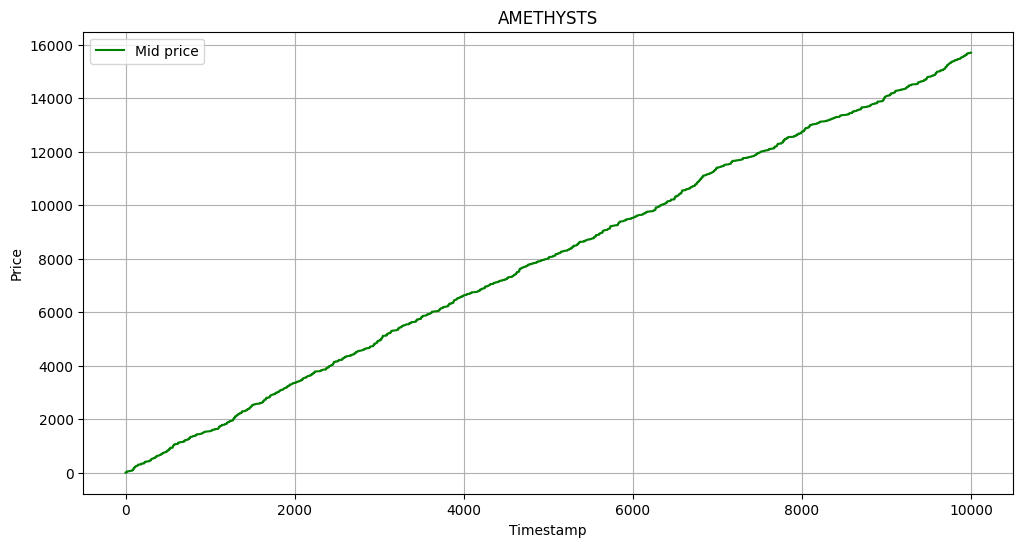

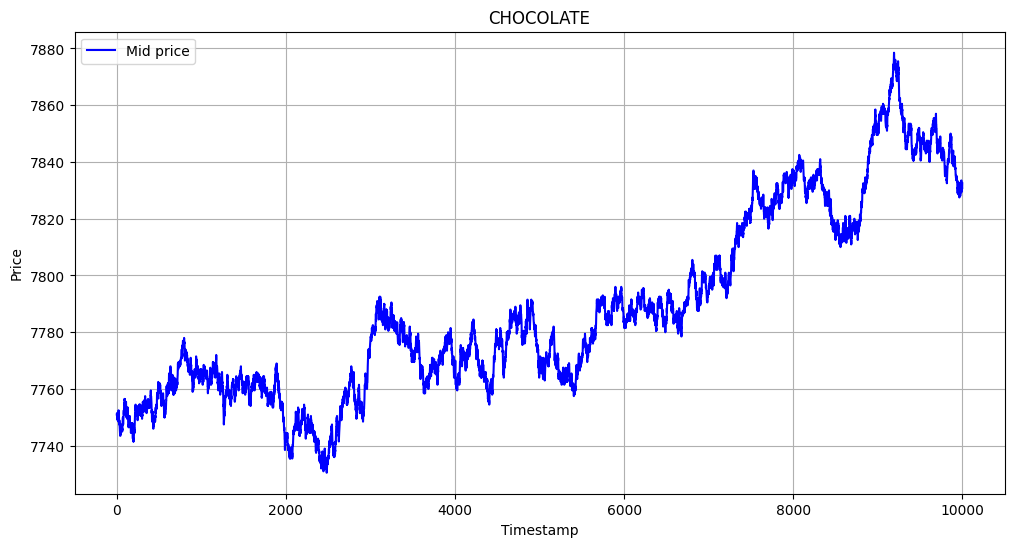

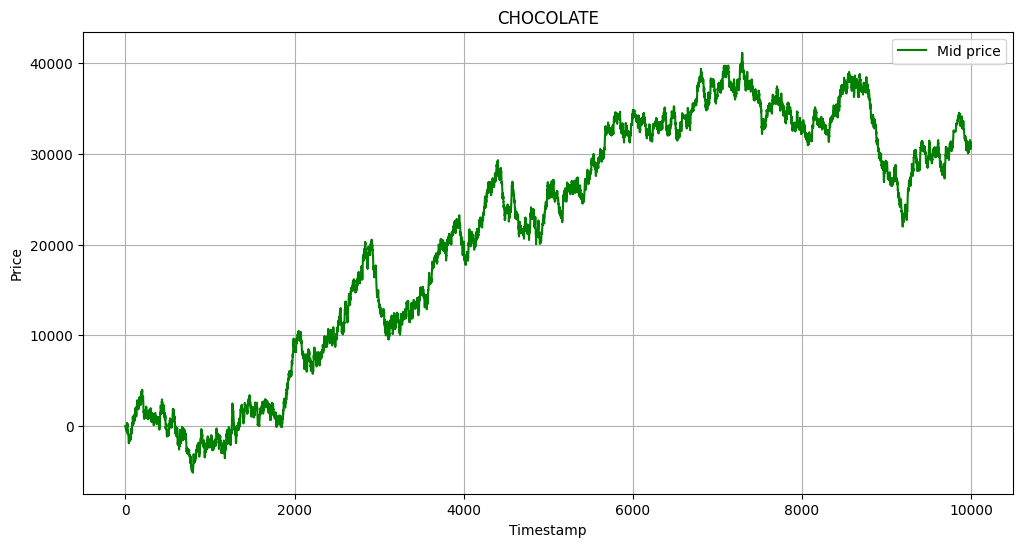

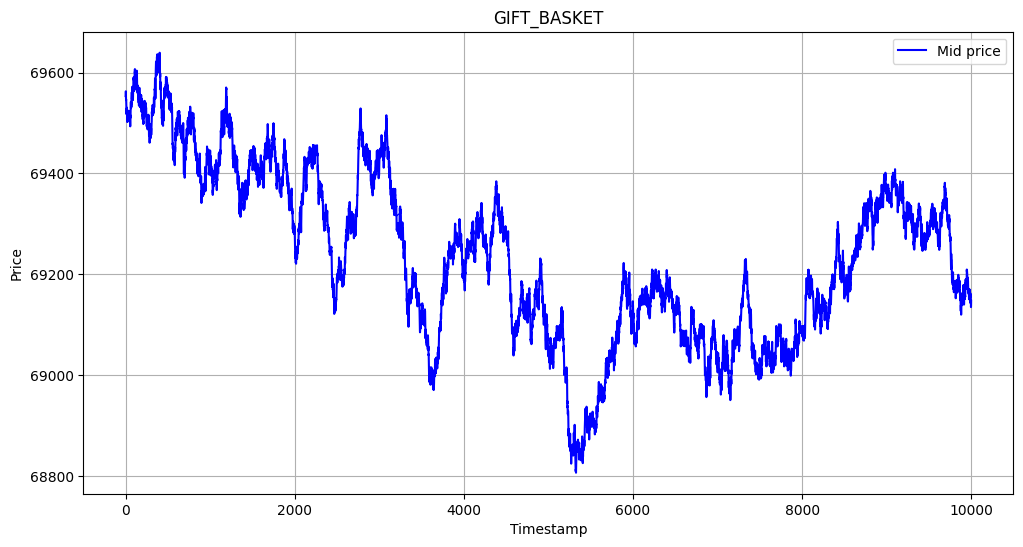

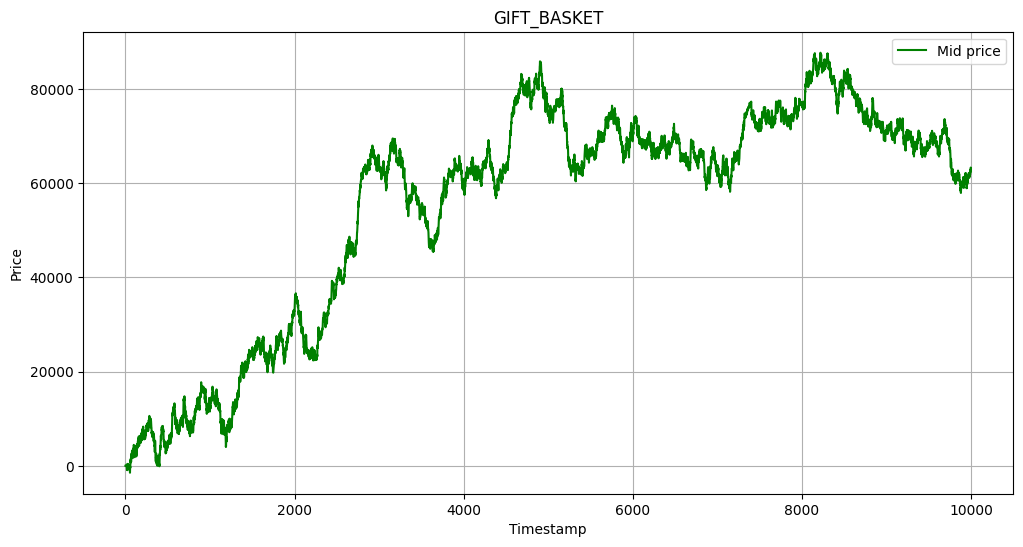

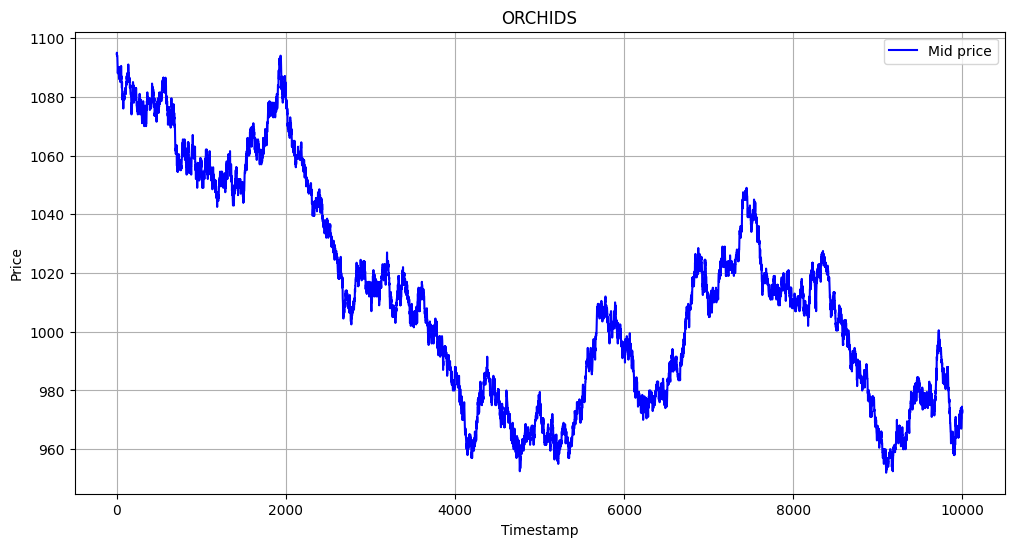

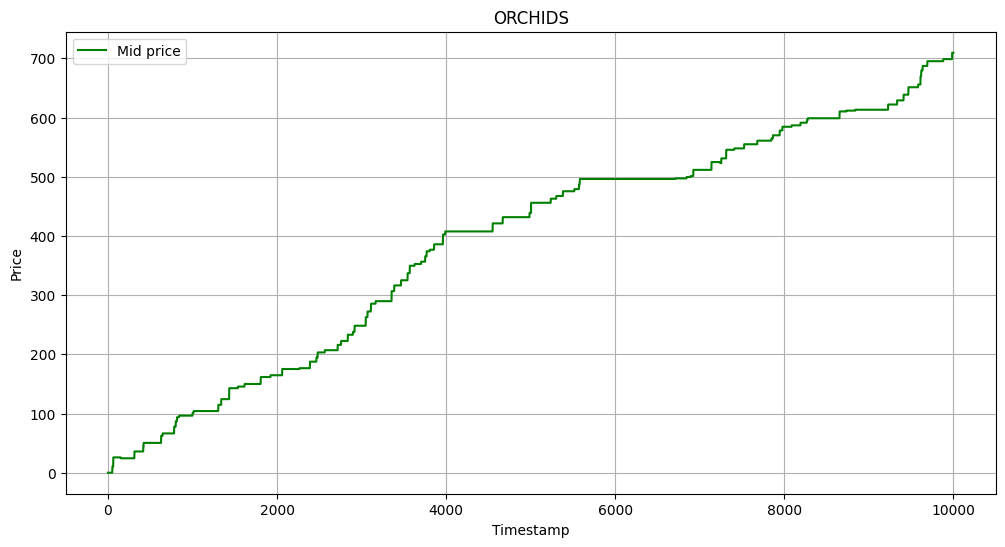

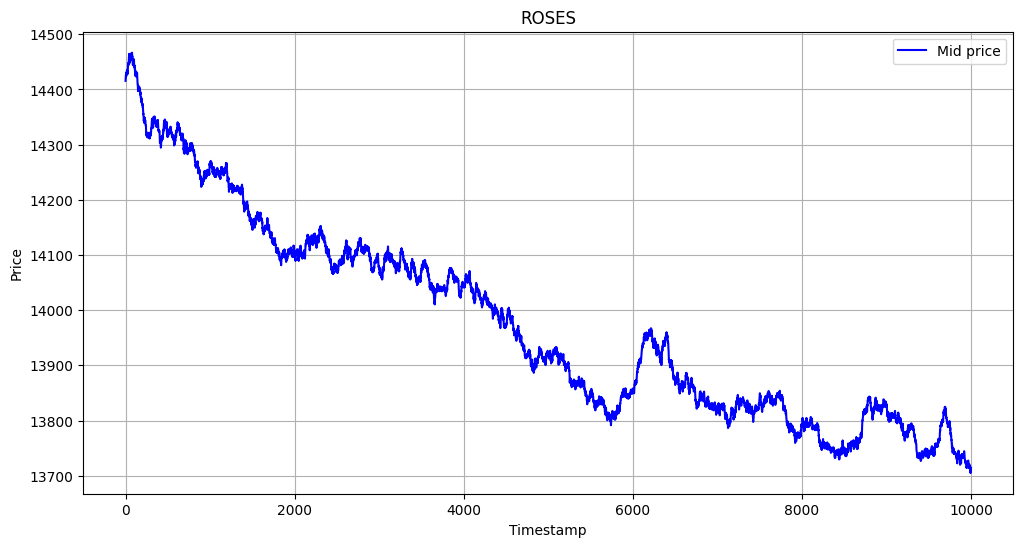

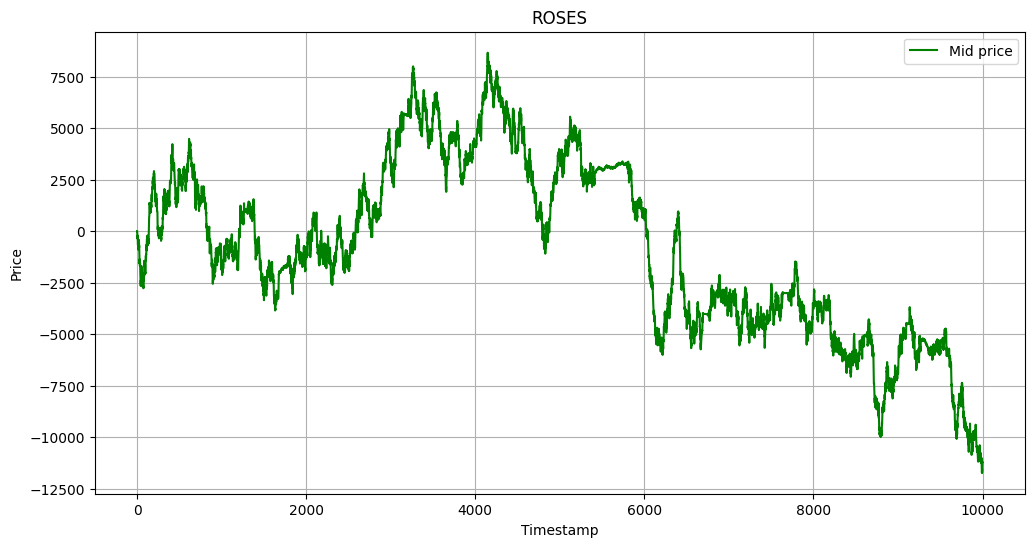

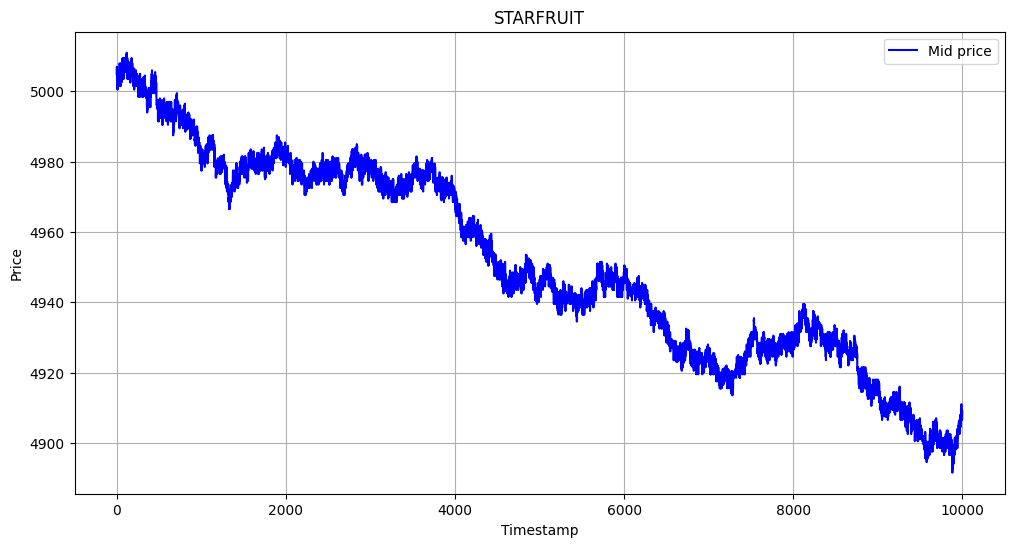

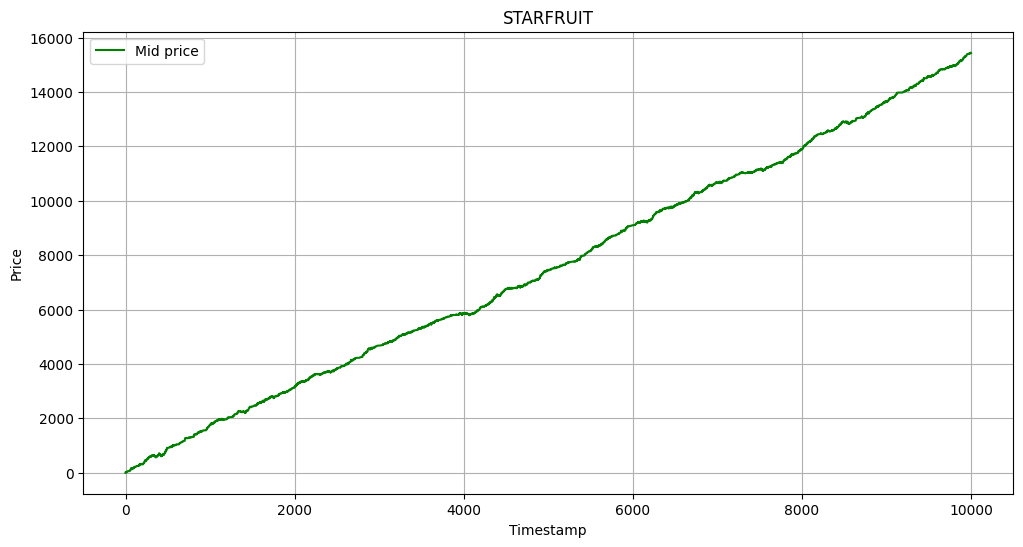

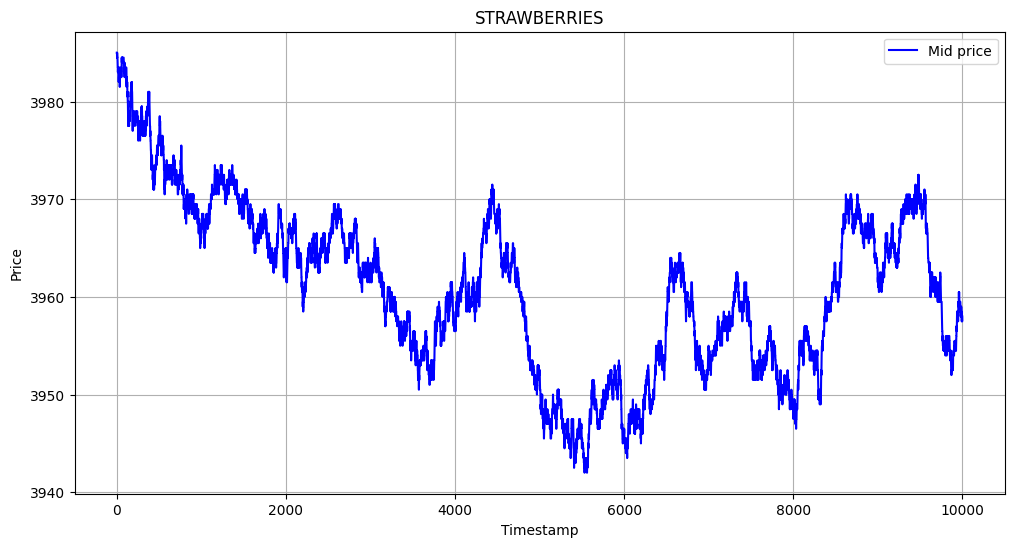

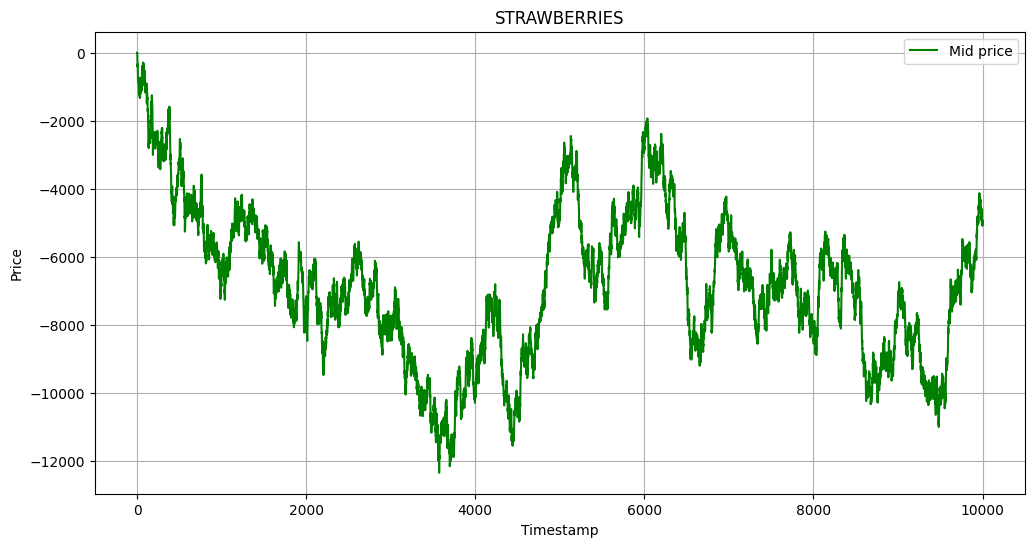

In [190]:
for prod in products:
    plt.figure(figsize=(12, 6))
    plt.plot(data[prod]["mid_price"].values[:], marker='', linestyle='-', color='b', label="Mid price")
    plt.title(prod)
    plt.xlabel("Timestamp")
    plt.ylabel("Price"),
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.plot(data[prod]["profit_and_loss"][:].values, marker='', linestyle='-', color='g', label="Mid price")
    plt.title(prod)
    plt.xlabel("Timestamp")
    plt.ylabel("Price"),
    plt.legend()
    plt.grid(True)
    plt.show()

In [188]:
result = coint(data["GIFT_BASKET"]["mid_price"] 
               - (1 * data["ROSES"][stat].values + 4 * data["CHOCOLATE"][stat].values + 6 * data["STRAWBERRIES"][stat].values), 
               data["GIFT_BASKET"]["mid_price"] 
               - (1 * data["ROSES"][stat].values + 4 * data["CHOCOLATE"][stat].values + 6 * data["STRAWBERRIES"][stat].values))

print(result)

(-1.6799089887769816, 0.6860168557963048, array([-3.90743646, -3.34225305, -3.04869817]))


In [568]:
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * 0.5 * (1 + math.erf(d1 / np.sqrt(2))) - K * np.exp(-r * T) * 0.5 * (1 + math.erf(d2 / np.sqrt(2)))
    return call_price

def black_scholes_implied_volatility(S, K, T, r, option_price, initial_guess=0.2, tol=1e-3, max_iter=10):
    sigma = initial_guess
    for i in range(max_iter):
        price = black_scholes_call(S, K, T, r, sigma)
        error = price - option_price
        if abs(error) < tol:
            return sigma
        vega = (S * 0.5 * (1 + math.erf((np.log(S / K) + (r + 0.5 * sigma ** 2) * T) 
                                            / (sigma * np.sqrt(T)) / np.sqrt(2))) * np.sqrt(T))
        sigma -= error / vega
    return sigma

0.1589371566494706
0.15890885895392792
0.1588722145044552
0.15883242616752374
0.15878588594374915
0.1587483655233617
0.158732510257993
0.1587253887832706
0.15873507040006485
0.15871637615174738
0.1587048577242464
0.1587106489929884
0.1587265696142196
0.15874871657277267
0.1587671148333634
0.15878611960168498
0.1587697828418257
0.15877165041846572
0.15877964081648288
0.15878711570495055
0.15879622462050957
0.15879502725673733
0.1587864106714043
0.1587855621269649
0.15878328807517506
0.15878620356636872
0.15878403232153088
0.1587706348702542
0.15874853060559146
0.15872456621316333
0.15870014540575564
0.1586695361577592
0.15863011115187053
0.1586009278229935
0.15858423540160582
0.15856711407525878
0.15855461610462226
0.15853906920755612
0.15852548362670438
0.15850849056544325
0.15849086245528543
0.15846934177713845
0.15844042211041
0.1584135344485425
0.15839311571212306
0.15837999856723756
0.1583652539009075
0.158350098531477
0.1583334346645106
0.15831621951804223
0.15829739924191014
0.15

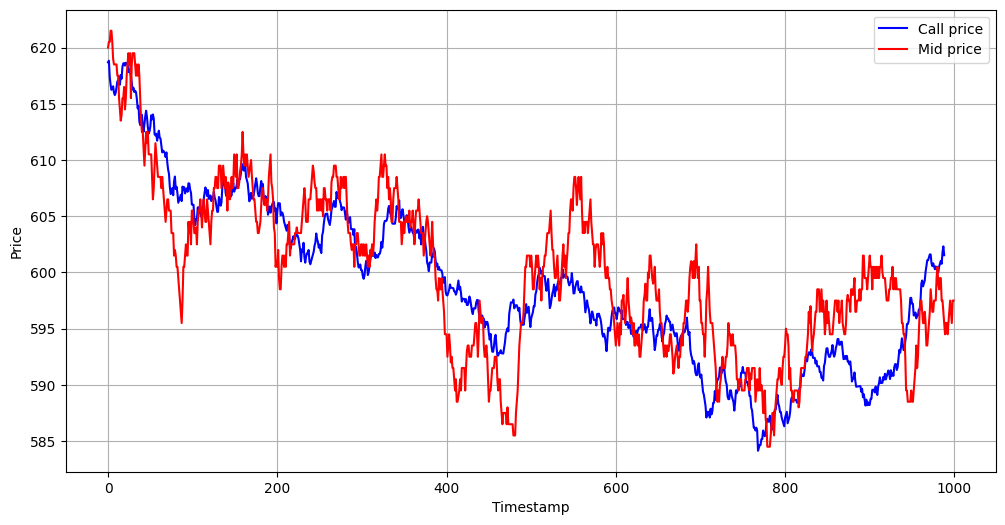

In [569]:
# csv_file_path = "./data/round_4/prices_round_4_day_3.csv"
csv_file_path = "./data/other/round_4_test_2024.csv"
df = pd.read_csv(csv_file_path, sep=';')

products = np.unique(df['product'])

data = {}
stat = 'mid_price'

for prod in products:
    data[prod] = df[df['product'] == prod]
    
returns = np.diff(np.log(data["COCONUT"]["mid_price"].values))
volatility = np.std(returns) * np.sqrt(252)

volatilities = []
call_prices = []

for i in range(1000):
    S = data["COCONUT"]["mid_price"].values[i]  # Current price of the underlying asset
    K = 10000  # Strike price
    T = 246 / 252    # Time to expiration (in years)
    r = 0 # Risk-free interest rate
    # sigma = 0.1575
    
    volatilities.append(black_scholes_implied_volatility(S, K, T, r, data["COCONUT_COUPON"]["mid_price"].values[i]))
    if i > 10:
        sigma = np.mean(volatilities)
        # sigma = 0.1575
        print(sigma)
        call_price = black_scholes_call(S, K, T, r, sigma)
        call_prices.append(call_price)
    
plt.figure(figsize=(12, 6))
plt.plot(call_prices, marker='', linestyle='-', color='b', label="Call price")
plt.plot(data["COCONUT_COUPON"]["mid_price"].values, marker='', linestyle='-', color='r', label="Mid price")
plt.xlabel("Timestamp")
plt.ylabel("Price"),
plt.legend()
plt.grid(True)
plt.show()